In [1]:
import json 
import pandas as pd
import bz2

In [2]:
%ls /datasets_1/sagarj/Flickr/

london_photos_lsoa.tsv.bz2


In [3]:
# with bz2.open("/datasets_1/sagarj/Flickr/london_photos_lsoa.tsv.bz2", "rb") as f:

#     # Decompress data from file

#     content = f.read()

In [4]:
df = pd.read_csv('/datasets_1/sagarj/Flickr/london_photos_lsoa.tsv.bz2', compression='bz2', sep='\t', names=["photoId", "userId", "nsid, server", "secret", "secretOriginal", "dateImported", "dateCreated", "dateTaken", "lat", "lon", "tags", "LSOA_ID"
])

In [5]:
df[:10]

,photoId,userId,"nsid, server",secret,secretOriginal,dateImported,dateCreated,dateTaken,lat,lon,tags,LSOA_ID
11945377795,46709459,46730789@N07,3693,3c1cb64940,07a735111b,1389700697,1389700708,2013-12-26 14:36:19.0,51.506320,-0.127140,"vision:riverbank=55,vision:nature=55,vision:sl...",E01004736
7683964932,1407330,11471080@N00,7270,bdcd50291f,8a400c2692,1343741136,1343741136,2012-02-03 13:33:56.0,51.467666,-0.084000,"vision:notebook=56,vision:microprocessor=50,vi...",E01004050
4865392645,52734882,52740222@N05,4143,822689db17,47a2301153,1281098227,1281098227,2010-03-25 15:31:00.0,51.527529,-0.082536,"circus space,trapeze,circus,vision:bungee=77,v...",E01033708
8824815624,3713296,56492397@N00,7443,80c32c1b0e,105b6b4415,1369483719,1369483719,2009-12-21 13:00:15.0,51.474166,-0.195334,"flickriosapp:filter=nofilter,iphone3gs,uploade...",E01001924
4199896407,45715090,45738144@N03,2715,7c70121cf3,7dd3fb4866,1261327944,1261327944,2009-12-10 10:56:08.0,51.577069,-0.285644,"vision:path=54,vision:architecture=56,vision:h...",E01000484
5234491407,33412015,33432363@N02,5164,21c93e858f,c7ddbce3b1,1291568825,1291568825,2010-11-23 20:49:48.0,51.604371,-0.252685,"vision:building=83,vision:outdoor=82,vision:ar...",E01000130
10234101783,98352688,98373036@N02,7370,8fb0e84999,3a9ddd9919,1381615866,1381615866,2013-10-11 21:50:39.0,51.513644,-0.094673,"vision:indoor=98,vision:brochette=66,vision:wi...",E01032739
5413448367,23701808,23747130@N06,5020,02710a6988,73fe7e581d,1296760923,1296760923,2011-01-29 23:56:18.0,51.521418,-0.071829,"vision:friends=93,vision:party=97,vision:feath...",E01004307
1442840605,14148757,14169105@N02,1225,5522ac8b97,24b34c3037,1190823839,1190823839,2005-06-16 19:53:04.0,51.534517,-0.055661,"vision:indoor=95,2005,may,gallery,degreeart.co...",E01004197
2952790046,5117514,79653482@N00,3190,c9c9e5b848,3d392df271,1224362935,1224362935,2008-09-10 10:47:13.0,51.484503,-0.291277,"copac,londýn,copaci,伦敦,grande-bretagne,لندن,br...",E01003847


In [6]:
def extractTags(entry):
    tags = []
    components = entry.split(',')
    for c in components:
        visonComps = c.split(':')
        if len(visonComps) == 1:
            tags.append(c)
        elif visonComps[0] == 'vision':
            comps = visonComps[-1].split('=')
            if len(comps) == 2:
                try:
                    confidence = int(comps[-1])
                except:
                    continue
                #Only take tags above 85 confidence
                if  confidence >= 85:
                    tags.append(''.join(comps[:-1]))
            else:
                continue
        else:
            continue
    return tags

In [7]:
sampledDf = df[['photoId','dateTaken','lon','lat','tags','LSOA_ID']]

In [8]:
sampledDf.iloc[5]['tags']

'vision:building=83,vision:outdoor=82,vision:art=57,vision:weathervane=88,vision:white=57,vision:lamppost=62,vision:white background=57,vision:cross=57,vision:steeple=56,vision:lego=56,vision:candlestick=71,vision:belfry=51,vision:shrine=51,vision:statue=57,vision:tower=57,vision:bell=74,vision:sculpture=57,vision:gargoyle=72,vision:lamp=90,vision:campanile=56,vision:roof=83,vision:monochrome=54,vision:candelabrum=71,vision:post=62,vision:streetlight=73,vision:dome=83,vision:architecture=83,vision:onion dome=83,vision:lantern=90,vision:blackandwhite=63,raw,iphoto original'

In [9]:
extractTags(sampledDf.iloc[10000]['tags'])

['plant',
 'tree',
 'nature',
 'outdoor',
 'bridge',
 'thames',
 'river',
 'strand on the green',
 'greater london',
 'kew',
 'uk']

In [10]:
sampledDf['tags_Extracted'] = sampledDf['tags'].apply(lambda x: extractTags(x))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
sampledDf[:10]

,photoId,dateTaken,lon,lat,tags,LSOA_ID,tags_Extracted
11945377795,46709459,2013-12-26 14:36:19.0,-0.127140,51.506320,"vision:riverbank=55,vision:nature=55,vision:sl...",E01004736,"[outdoor, vehicle, boat]"
7683964932,1407330,2012-02-03 13:33:56.0,-0.084000,51.467666,"vision:notebook=56,vision:microprocessor=50,vi...",E01004050,"[indoor, text, dropbox, automatc]"
4865392645,52734882,2010-03-25 15:31:00.0,-0.082536,51.527529,"circus space,trapeze,circus,vision:bungee=77,v...",E01033708,"[circus space, trapeze, circus, people, jump, ..."
8824815624,3713296,2009-12-21 13:00:15.0,-0.195334,51.474166,"flickriosapp:filter=nofilter,iphone3gs,uploade...",E01001924,"[iphone3gs, hallway, vault, floor, hall, indoor]"
4199896407,45715090,2009-12-10 10:56:08.0,-0.285644,51.577069,"vision:path=54,vision:architecture=56,vision:h...",E01000484,[outdoor]
5234491407,33412015,2010-11-23 20:49:48.0,-0.252685,51.604371,"vision:building=83,vision:outdoor=82,vision:ar...",E01000130,"[weathervane, lamp, lantern, raw, iphoto origi..."
10234101783,98352688,2013-10-11 21:50:39.0,-0.094673,51.513644,"vision:indoor=98,vision:brochette=66,vision:wi...",E01032739,[indoor]
5413448367,23701808,2011-01-29 23:56:18.0,-0.071829,51.521418,"vision:friends=93,vision:party=97,vision:feath...",E01004307,"[friends, party, people, club, vibe bar, freak..."
1442840605,14148757,2005-06-16 19:53:04.0,-0.055661,51.534517,"vision:indoor=95,2005,may,gallery,degreeart.co...",E01004197,"[indoor, 2005, may, gallery, degreeart.com, de..."
2952790046,5117514,2008-09-10 10:47:13.0,-0.291277,51.484503,"copac,londýn,copaci,伦敦,grande-bretagne,لندن,br...",E01003847,"[copac, londýn, copaci, 伦敦, grande-bretagne, ل..."


In [12]:
tags = pd.read_csv('smell_eng_vs2.txt',sep='\t', names=["tag", "tax"])

In [38]:
Diversity_tags = pd.read_csv('naturesensing_visualscape_tags.csv')

In [40]:
Diversity_tags

,Tags,Taxon Group
0,Barn Owl,Bird
1,Blackbird,Bird
2,Blackcap,Bird
3,Black-headed Gull,Bird
4,Blue Tit,Bird
...,...,...
220,Maple,Higher Plants - Flowering Plants
221,Butterfly-bush,Higher Plants - Flowering Plants
222,English Elm,Higher Plants - Flowering Plants
223,Elm,Higher Plants - Flowering Plants


In [48]:
set(Diversity_tags['Taxon Group'])

{'Amphibian',
 'Beetle',
 'Bird',
 'Butterflies',
 'Higher Plants - Flowering Plants',
 'Mammals',
 'Moth'}

In [41]:
diversityTags = list(Diversity_tags['Tags'])

In [13]:
natureTags =[]
for index , row in tags.iterrows():
    if '9' in row['tax']:
        natureTags.append(row['tag'])

In [74]:
def getNatureTags(entry):
    intags = set(list(entry)).intersection(natureTags)
    return len(intags)

def getDiversityTagsCount(entry):
    intags = set(list(entry)).intersection(diversityTags)
    return len(intags)

def getDiversityTags(entry):
    intags = set(list(entry)).intersection(diversityTags)
    return intags

In [15]:
getNatureTags(sampledDf.iloc[150]['tags_Extracted'])

0

In [46]:
getDiversityTags(sampledDf.iloc[1000]['tags_Extracted'])

0

In [16]:
sampledDf['nature_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getNatureTags(x))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
sampledDf['diversity_tags'] = sampledDf['tags_Extracted'].apply(lambda x: getDiversityTagsCount(x))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
sampledDf['diversity'] = sampledDf['tags_Extracted'].apply(lambda x: getDiversityTags(x))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bio_tags_list = []
for index , row in sampledDf.iterrows():
    if len[list(row['diversity'])] > 0:
        bio_tags_list+=list(row['diversity'])

In [49]:
sum(sampledDf['diversity_tags'])

1837

In [17]:
sampledDf['tag_count'] = sampledDf['tags_Extracted'].apply(lambda x: len(list(x)))

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
sampledDf[:10]

,photoId,dateTaken,lon,lat,tags,LSOA_ID,tags_Extracted,nature_tags,tag_count
11945377795,46709459,2013-12-26 14:36:19.0,-0.127140,51.506320,"vision:riverbank=55,vision:nature=55,vision:sl...",E01004736,"[outdoor, vehicle, boat]",0,3
7683964932,1407330,2012-02-03 13:33:56.0,-0.084000,51.467666,"vision:notebook=56,vision:microprocessor=50,vi...",E01004050,"[indoor, text, dropbox, automatc]",0,4
4865392645,52734882,2010-03-25 15:31:00.0,-0.082536,51.527529,"circus space,trapeze,circus,vision:bungee=77,v...",E01033708,"[circus space, trapeze, circus, people, jump, ...",0,10
8824815624,3713296,2009-12-21 13:00:15.0,-0.195334,51.474166,"flickriosapp:filter=nofilter,iphone3gs,uploade...",E01001924,"[iphone3gs, hallway, vault, floor, hall, indoor]",0,6
4199896407,45715090,2009-12-10 10:56:08.0,-0.285644,51.577069,"vision:path=54,vision:architecture=56,vision:h...",E01000484,[outdoor],0,1
5234491407,33412015,2010-11-23 20:49:48.0,-0.252685,51.604371,"vision:building=83,vision:outdoor=82,vision:ar...",E01000130,"[weathervane, lamp, lantern, raw, iphoto origi...",0,5
10234101783,98352688,2013-10-11 21:50:39.0,-0.094673,51.513644,"vision:indoor=98,vision:brochette=66,vision:wi...",E01032739,[indoor],0,1
5413448367,23701808,2011-01-29 23:56:18.0,-0.071829,51.521418,"vision:friends=93,vision:party=97,vision:feath...",E01004307,"[friends, party, people, club, vibe bar, freak...",0,8
1442840605,14148757,2005-06-16 19:53:04.0,-0.055661,51.534517,"vision:indoor=95,2005,may,gallery,degreeart.co...",E01004197,"[indoor, 2005, may, gallery, degreeart.com, de...",0,11
2952790046,5117514,2008-09-10 10:47:13.0,-0.291277,51.484503,"copac,londýn,copaci,伦敦,grande-bretagne,لندن,br...",E01003847,"[copac, londýn, copaci, 伦敦, grande-bretagne, ل...",4,66


In [55]:
LSOA_Nature_tags = {'LSOA_CODE':[] , 'Nature':[] , 'Total' : [] , 'Diversity' : []}
for name , group in sampledDf.groupby('LSOA_ID'):
    LSOA_Nature_tags['LSOA_CODE'].append(name)
    LSOA_Nature_tags['Nature'].append(sum(group['nature_tags']))
    LSOA_Nature_tags['Diversity'].append(sum(group['diversity_tags']))
    LSOA_Nature_tags['Total'].append(sum(group['tag_count']))
LSOA_Flicker_Nature = pd.DataFrame.from_dict(LSOA_Nature_tags)

In [56]:
LSOA_Flicker_Nature.to_csv('Flicker_nature_tags.csv')

In [57]:
lsoa_df = pd.read_csv('../../BL_Work/Lower_Layer_Super_Output_Area_2011_to_Ward_2015_Lookup_in_England_and_Wales.csv')

In [58]:
lsoa_df

,LSOA11CD,LSOA11NM,WD15CD,WD15NM,WD15NMW,LAD15CD,LAD15NM,FID
0,E01000104,Barking and Dagenham 014B,E05000041,Village,,E09000002,Barking and Dagenham,1
1,E01000105,Barking and Dagenham 014C,E05000041,Village,,E09000002,Barking and Dagenham,2
2,E01000106,Barking and Dagenham 014D,E05000041,Village,,E09000002,Barking and Dagenham,3
3,E01000107,Barking and Dagenham 010C,E05000041,Village,,E09000002,Barking and Dagenham,4
4,E01000108,Barking and Dagenham 010D,E05000041,Village,,E09000002,Barking and Dagenham,5
...,...,...,...,...,...,...,...,...
34748,W01001911,The Vale of Glamorgan 012H,W05000635,Castleland,Castleland,W06000014,Vale of Glamorgan,34749
34749,W01001860,Cardiff 034C,W05000877,Riverside,Glanyrafon,W06000015,Cardiff,34750
34750,W01001753,Cardiff 031C,W05000861,Fairwater,Tyllgoed,W06000015,Cardiff,34751
34751,W01001754,Cardiff 031D,W05000861,Fairwater,Tyllgoed,W06000015,Cardiff,34752


In [59]:
ward_lsoa_map = {}
for name , group in lsoa_df.groupby('WD15CD'):
    ward_lsoa_map[name] = list(group['LSOA11CD'])

In [60]:
ward_Flickr_dict = {'GSS_CODE':[] , 'Total' : [] , 'Nature' : [] , 'Diversity' :[]}
for k in ward_lsoa_map:
    ward_slice = LSOA_Flicker_Nature[LSOA_Flicker_Nature['LSOA_CODE'].isin(ward_lsoa_map[k])]
    if len(ward_slice) > 0:
        ward_Flickr_dict['GSS_CODE'].append(k)
        ward_Flickr_dict['Total'].append(sum(ward_slice['Total']))
        ward_Flickr_dict['Nature'].append(sum(ward_slice['Nature']))
        ward_Flickr_dict['Diversity'].append(sum(ward_slice['Diversity']))

In [61]:
Ward_Flicker_Nature = pd.DataFrame.from_dict(ward_Flickr_dict)

In [62]:
Ward_Flicker_Nature['Score'] = Ward_Flicker_Nature['Nature']/Ward_Flicker_Nature['Total']

In [63]:
Ward_Flicker_Nature[:10]

,GSS_CODE,Total,Nature,Diversity,Score
0,E05000026,32748,519,1,0.015848
1,E05000027,12155,1240,0,0.102016
2,E05000028,4706,174,0,0.036974
3,E05000029,6745,44,0,0.006523
4,E05000030,72372,949,0,0.013113
5,E05000031,3980,48,0,0.012060
6,E05000032,7741,63,0,0.008138
7,E05000033,2260,50,0,0.022124
8,E05000034,8682,49,0,0.005644
9,E05000035,19611,1074,6,0.054765


In [64]:
Ward_Flicker_Nature.to_csv('Ward_Flicker_nature_tags.csv')

In [65]:
len(Ward_Flicker_Nature)

634

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [67]:
wards_shape = gpd.read_file('../Data/Geo_Data/geo/london_wards.shp')

In [68]:
wards_with_data = pd.merge(wards_shape , Ward_Flicker_Nature , left_on='CODE', right_on = 'GSS_CODE')

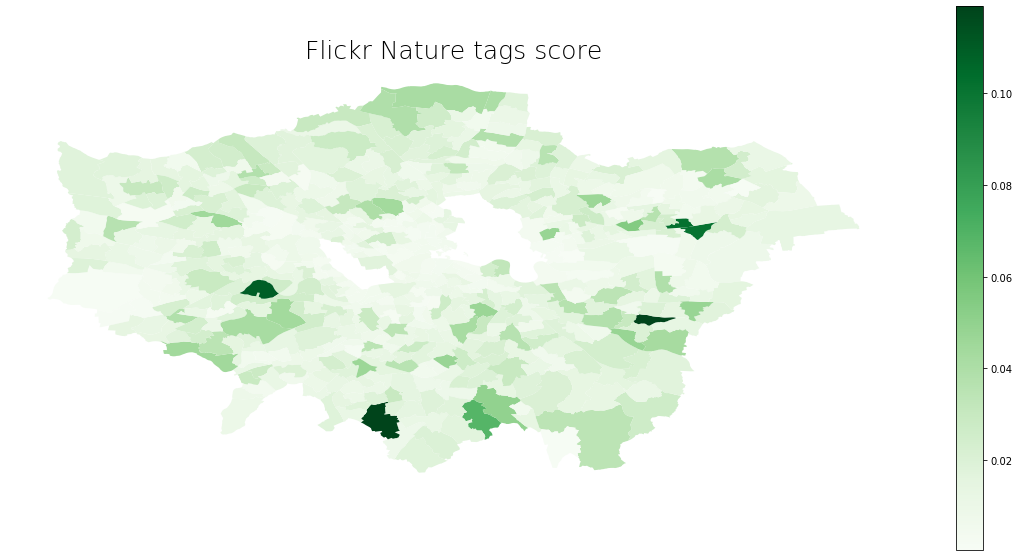

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Flickr Nature tags score', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['Score'].min(), vmax=wards_with_data['Score'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='Score', cmap='Greens', linewidth=0.8)

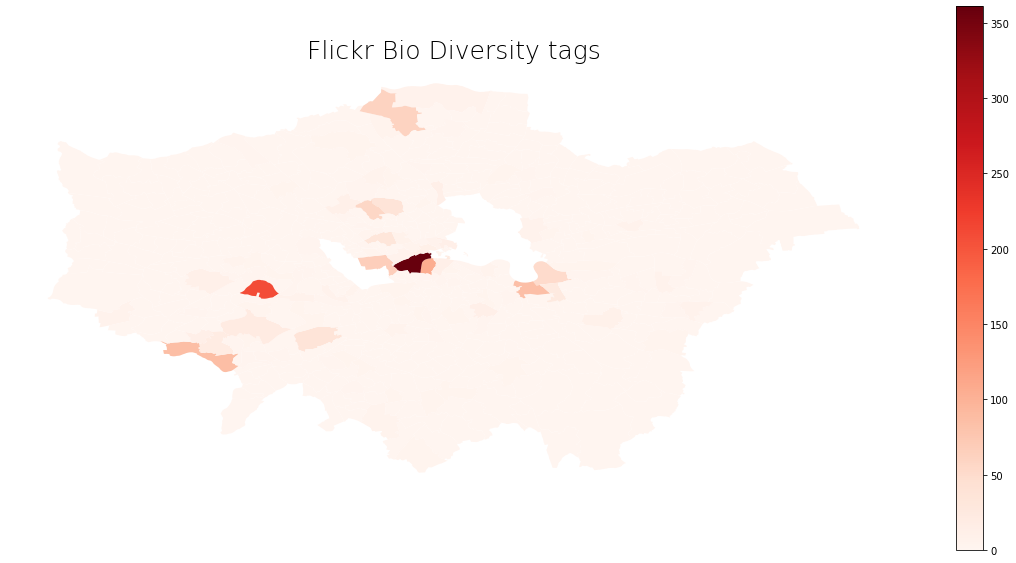

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Flickr Bio Diversity tags', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=wards_with_data['Diversity'].min(), vmax=wards_with_data['Diversity'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='Diversity', cmap='Reds', linewidth=0.8)